# __TIME SERIES 

 * __Predicting the Stock of MRF using Time series__

* __In mathematics, a time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data__


_________________________________________________________________________________________

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
#ADF (augmented Dicky -Fuller test)
from statsmodels.tsa.stattools import adfuller,acf,pacf
#ljung-Box test
import statsmodels.api as sm
#ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [4]:
stock=pd.read_csv('F:\\DATA SCIENCE\\R and stats\\WORKING OF R\\Unsupervised learning\\Time series\\MRF stock forecast\\mrf.csv')
stock.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      125 non-null    object 
 1   Open Price                 125 non-null    float64
 2   High Price                 125 non-null    float64
 3   Low Price                  125 non-null    float64
 4   Close Price                125 non-null    float64
 5   No.of Shares               125 non-null    int64  
 6   No. of Trades              125 non-null    int64  
 7   Total Turnover (Rs.)       125 non-null    int64  
 8   Deliverable Quantity       125 non-null    int64  
 9   % Deli. Qty to Traded Qty  125 non-null    float64
 10  Spread High-Low            125 non-null    float64
 11  Spread Close-Open          125 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 11.8+ KB


In [5]:
stock

,Month,Open Price,High Price,Low Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,Jan-06,2780.0,2895.50,2670.00,2811.60,39623,3358,109309329,27061,68.30,225.50,31.60
1,Feb-06,2820.0,3399.00,2800.00,3056.45,77350,8001,242294622,42901,55.46,599.00,236.45
2,Mar-06,3075.0,3287.50,3040.00,3103.20,55500,4988,176800378,39229,70.68,247.50,28.20
3,Apr-06,3160.0,4051.00,3131.00,3456.15,131712,12834,496800616,59934,45.50,920.00,296.15
4,May-06,3550.0,3650.00,2747.00,2789.80,29158,4432,96482558,18375,63.02,903.00,-760.20
...,...,...,...,...,...,...,...,...,...,...,...,...
120,Jan-16,40000.0,41399.95,34563.20,35607.10,26932,17034,1006108230,4729,17.56,6836.75,-4392.90
121,Feb-16,35672.1,35865.00,31190.00,32429.35,32170,17876,1074868513,7537,23.43,4675.00,-3242.75
122,Mar-16,32400.0,38969.35,32400.00,38368.50,27914,15957,977646892,5463,19.57,6569.35,5968.50
123,Apr-16,38100.0,38299.00,33550.05,33791.60,24913,14792,895271041,5481,22.00,4748.95,-4308.40


In [ ]:
stock.shape

In [6]:
mystock=stock[['Close Price']]

* __Function to check the stationarity__ 

In [7]:
def checkstationarity(data):
    #adfuller() returns following()
    #test statistics,pvalue,lags,totalobeservations
    
    pval=adfuller(data)[1]
    
    if pval > 0.05:
        msg='pvalue={}. data not stationary '.format(pval)     
    else:
        msg='pvalue={}.Data is stationary'.format(pval)
    return(msg)

* __Check for stationarity of data__

In [8]:
checkstationarity(mystock)
#so result is data is not stationary
#since the data is not stationary ,it has to be made stationary

'pvalue=0.9574107029213336. data not stationary '

In [9]:
diff_mystock=mystock - mystock.shift()
print("before deletating  NA.count=",len(diff_mystock))    

before deletating  NA.count= 125


* __Drop the NA from the dataset__

In [10]:
diff_mystock.dropna(inplace=True)
#check for count

In [11]:
print('After droping the NA.count=',len(diff_mystock))

After droping the NA.count= 124


In [12]:
print(diff_mystock)
checkstationarity(diff_mystock)
#data has shown now stationary

     Close Price
1         244.85
2          46.75
3         352.95
4        -666.35
5        -393.95
..           ...
120     -4240.50
121     -3177.75
122      5939.15
123     -4576.90
124       -32.00

[124 rows x 1 columns]


'pvalue=5.060193512253538e-23.Data is stationary'

* __Plot the actual and stationary data__

Text(0.5, 1.0, 'Actual close price')

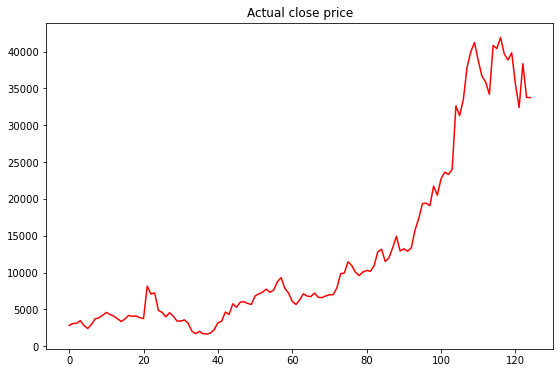

In [19]:
plt.figure(figsize=(20,6))    
plt.subplot(121)
plt.plot(mystock,color='red')
plt.title('Actual close price')

Text(0.5, 1.0, 'Difffrence closed price(stationary)')

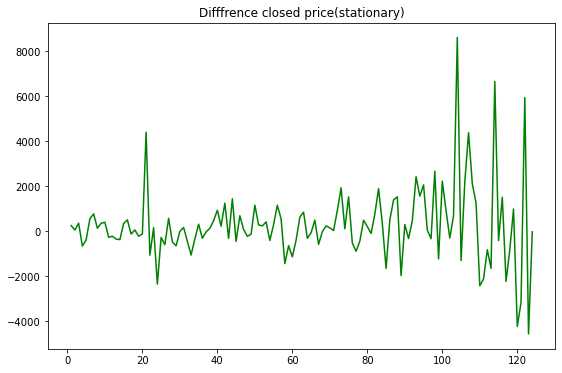

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(122)
plt.plot(diff_mystock, color='green')
plt.title('Difffrence closed price(stationary)')

* __Plot the Coreelogram to identify the p and q (lags for AR and MA process)__

* Set the PACF and ACF lag value 

In [21]:
lags_pacf=pacf(diff_mystock,nlags=20)
lags_acf=acf(diff_mystock,nlags=20)
lags_pacf

E:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.11866481,  0.01641407,  0.09425708, -0.02578384,
       -0.02749401,  0.02190857, -0.00741127,  0.17656038, -0.08850269,
        0.2272589 ,  0.04619164,  0.03012128, -0.09509764, -0.0177338 ,
       -0.02434713, -0.14879876, -0.2862637 , -0.00127917, -0.09145898,
       -0.07174658])

ACF to identify p<br>
lotting of pacf and acf

TypeError: unsupported operand type(s) for /: 'float' and 'numpy.ufunc'

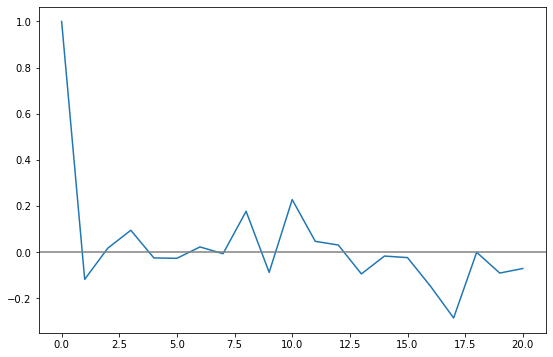

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(lags_pacf)
plt.axhline(y=0,linestyle='-',color='gray')
plt.axhline(y=-1.96/np.sqrt)

In [24]:
p=0;q=0;d=0
#build the ARIMA model

In [25]:
m1=ARIMA(diff_mystock, order=(p,q,d)).fit(disp=0)
m1.summary()

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Close Price   No. Observations:                  124
Model:                     ARMA(0, 0)   Log Likelihood               -1096.589
Method:                           css   S.D. of innovations           1676.599
Date:                Sun, 20 Jun 2021   AIC                           2197.178
Time:                        10:28:25   BIC                           2202.819
Sample:                             0   HQIC                          2199.470
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.5806    150.563      1.658      0.097     -45.517     544.679
==============================================================================
"""

*__Plot Ljung-box test to check the model goodnes__

Text(0.5, 1.0, 'ARIMA model residuals')

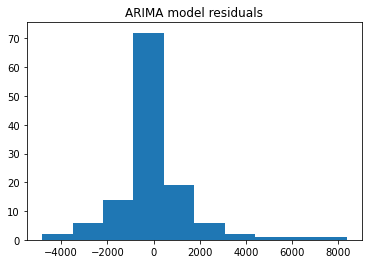

In [26]:
plt.hist(m1.resid)
plt.title('ARIMA model residuals')
#so its noramlly distributed

Ljung box test to check the model goodness<br>
0:residuals are independantly distributed<br>
1:residuals are not independaantly distributed

In [27]:
pvalue=sm.stats.acorr_ljungbox(m1.resid,lags=[1])[1] 
pvalue

E:\anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


array([0.18463199])

In [28]:
if pvalue >0.05 :
    print('failed to reject null hypo residuals are indepenantly distrbuted')
else:
    print('Reject H0.residuals are not indepenantly distrbuted')
    
    
#Forecast for the next 12 months

failed to reject null hypo residuals are indepenantly distrbuted


In [29]:
f1=m1.forecast(steps=12)

* __here actual forecast values are the first set of values in the ouput

In [30]:
forecasts=f1[0]
print(forecasts)
stock['Close Price'].tail()
#now add the forcast to the curretn value of stock

[249.58064516 249.58064516 249.58064516 249.58064516 249.58064516
 249.58064516 249.58064516 249.58064516 249.58064516 249.58064516
 249.58064516 249.58064516]


120    35607.10
121    32429.35
122    38368.50
123    33791.60
124    33759.60
Name: Close Price, dtype: float64